In [ ]:
import numpy as np
import pandas as pd
import cv2

In [ ]:
from matplotlib import pyplot as plt
import random

In [ ]:
def generate_color(s):
  r = random.randint(0,205) + 50
  g = random.randint(0,205) + 50
  b = random.randint(0,205) + 50
  color = np.array([r,g,b])
  if(s):
    im = np.zeros((50,50,3),dtype=np.int64)
    im[0:50,0:50]= color
    plt.figure().set_size_inches(5,1)
    plt.imshow(im)
    plt.axis("off")
    plt.show()
  return color

In [ ]:
def data():
  x_new,y_new = [],[]

  for i in range(15):
    inp = generate_color(1)
    x_new.append(list(inp))
    print("Enter preference in a scale of 1 to 5")
    oup = int(input())
    y_new.append(oup)

  return x_new,y_new

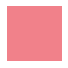

Enter preference in a scale of 1 to 5
3


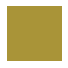

Enter preference in a scale of 1 to 5
1


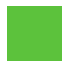

Enter preference in a scale of 1 to 5
5


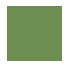

Enter preference in a scale of 1 to 5
1


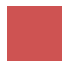

Enter preference in a scale of 1 to 5
3


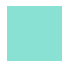

Enter preference in a scale of 1 to 5
2


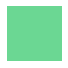

Enter preference in a scale of 1 to 5
4


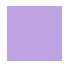

Enter preference in a scale of 1 to 5
5


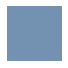

Enter preference in a scale of 1 to 5
5


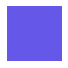

Enter preference in a scale of 1 to 5
5


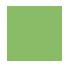

Enter preference in a scale of 1 to 5
3


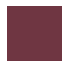

Enter preference in a scale of 1 to 5
1


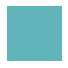

Enter preference in a scale of 1 to 5
5


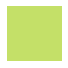

Enter preference in a scale of 1 to 5
1


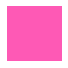

Enter preference in a scale of 1 to 5
2


In [ ]:
x_new,y_new = data()
x_new = np.array(x_new)/255
y_new = np.array(y_new)/5

In [ ]:
x_train= x_new
y_train = y_new

In [ ]:
learning_rate = 0.1
iterations = 1000

In [ ]:
# number of neurons at the input layer
input_size = 3

# number of hidden layer neurons
hidden_size = 12 

# number of neurons at the output layer
output_size = 1

In [ ]:
# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [ ]:
W1.shape,W2.shape

((3, 12), (12, 1))

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

In [ ]:
def epochs(x_train,y_train,W1,W2):
  for itr in range(iterations):    
    
    # feedforward propagation on hidden layer
    Zin = np.dot(x_train, W1)
    Z = sigmoid(Zin)

    # on output layer
    yin = np.dot(Z, W2)
    y = sigmoid(yin)    
    
    mse = mean_squared_error(y, y_train)
    y_train = y_train.reshape(-1,1)
    
    # backpropagation
    E1 = y_train - y
    dW1 = E1 * y * (1 - y)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * Z * (1 - Z)
    
    # weight updation
    W2_update = np.dot(Z.T, dW1)
    W1_update = np.dot(x_train.T, dW2)

    W2 = W2 + learning_rate * W2_update
    W1 = W1 + learning_rate * W1_update

  return mse,W1,W2

In [ ]:
mse,W1,W2 = epochs(x_train,y_train,W1,W2)

In [ ]:
def make_predictions(x_test): 
    Z1 = np.dot(x_test, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    val = A2*5
    return val

In [ ]:
def make_recommendations(Data_X,Data_Y,n,):  
  for i in range(n):
    col = generate_color(0)
    col = np.array(col)/255
    col = col.reshape(1,-1)
    pred = make_predictions(col)
    Data_X = np.concatenate([Data_X,col])
    Data_Y = np.concatenate([Data_Y,pred[0]])
  return Data_X,Data_Y

In [ ]:
Data_X,Data_Y = np.array([]).reshape(-1,3),np.array([])

In [ ]:
Data_X,Data_Y = make_recommendations(Data_X,Data_Y,2000)

In [ ]:
indexes = np.argsort(Data_Y)
values = Data_X[indexes]
c = np.where(np.diff(values,axis=0)>np.array([0.3,0.3,0.3]))

In [ ]:
new_Y = Data_Y[c[0]]
new_X = Data_X[c[0]]
indexes = np.argsort(new_Y)[-10:]
col_val = new_X[indexes]
pref_val = new_Y[indexes]

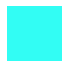

Preference predicted: 4.713341783522006 ~ 5


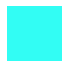

Preference predicted: 4.713341783522006 ~ 5


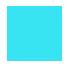

Preference predicted: 4.690661961162393 ~ 5


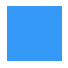

Preference predicted: 4.685581314591529 ~ 5


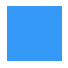

Preference predicted: 4.685581314591529 ~ 5


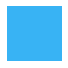

Preference predicted: 4.67926844414677 ~ 5


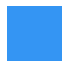

Preference predicted: 4.671258371190033 ~ 5


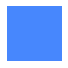

Preference predicted: 4.656820135599379 ~ 5


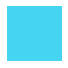

Preference predicted: 4.654499586092325 ~ 5


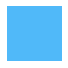

Preference predicted: 4.648198597965855 ~ 5


In [ ]:
for i in range(9,-1,-1):
    color = col_val[i] *255
    im = np.zeros((50,50,3),dtype=np.int64)
    im[0:50,0:50]= color
    plt.figure().set_size_inches(5,1)
    plt.imshow(im)
    plt.axis("off")
    plt.show()
    print("Preference predicted:",pref_val[i],"~",round(pref_val[i]))

In [ ]:
print("MSE after ",iterations," iterations:",mse)

MSE after  1000  iterations: 0.03083483408441365
